In [1]:
# 读取信用卡数据
import numpy as np
import pandas as pd

credit_card_data = pd.read_csv('credit_card.csv', encoding='gbk')
print(credit_card_data)

           信用卡顾客编号  申请书来源  瑕疵户  逾期  呆账  借款余额  退票  拒往记录  强制停卡记录  张数  ...  \
0      CDMS0000001      5    2   2   2     2   2     2       2   1  ...   
1      CDMS0000002      3    2   2   2     2   2     2       2   2  ...   
2      CDMS0000003      2    2   2   2     2   2     2       2   2  ...   
3      CDMS0000004      3    2   2   2     2   2     2       2   2  ...   
4      CDMS0000005      6    2   2   2     2   2     2       2   2  ...   
...            ...    ...  ...  ..  ..   ...  ..   ...     ...  ..  ...   
65530  CDMS0065531      4    2   2   2     2   2     2       2   2  ...   
65531  CDMS0065532      3    2   2   2     2   2     2       2   2  ...   
65532  CDMS0065533      3    2   2   2     2   2     2       2   2  ...   
65533  CDMS0065534      6    2   1   1     1   1     1       1   3  ...   
65534  CDMS0065535      5    2   2   2     2   2     2       2   1  ...   

       个人月收入  个人月开销  住家  家庭月收入  月刷卡额  宗教信仰  人口数  家庭经济  血型  星座  
0          1      1   1      1     

In [2]:
# 丢弃 逾期==呆帐==强制停卡==退票==拒往记录==1 && 瑕疵户==2 的行
credit_card_data = credit_card_data.drop(credit_card_data[(credit_card_data['逾期'] == 1) &
                                                          (credit_card_data['呆账'] == 1) &
                                                          (credit_card_data['强制停卡记录'] == 1) &
                                                          (credit_card_data['退票'] == 1) &
                                                          (credit_card_data['拒往记录'] == 1) &
                                                          (credit_card_data['瑕疵户'] == 2)].index)
print('现在的维度！：', credit_card_data.shape)

现在的维度！： (63339, 28)


In [3]:
# 丢弃 呆账==强制停卡==退票==1 && 拒往记录==2 的行
credit_card_data = credit_card_data.drop(credit_card_data[
                                             (credit_card_data['呆账'] == 1) &
                                             (credit_card_data['强制停卡记录'] == 1) &
                                             (credit_card_data['退票'] == 1) &
                                             (credit_card_data['拒往记录'] == 2)
                                             ].index)
print('现在的维度！！：', credit_card_data.shape)

现在的维度！！： (63081, 28)


In [48]:
# 丢弃频率==5 && 刷卡金额!=1 的行
credit_card_data = credit_card_data.drop(credit_card_data[
                                             (credit_card_data['频率'] == 5) &
                                             (credit_card_data['月刷卡额'] != 1)
                                             ].index)
print('现在的维度！！!：', credit_card_data.shape)

现在的维度！！!： (60578, 28)


           申请书来源       瑕疵户        逾期        呆账      借款余额        退票      拒往记录  \
申请书来源   1.000000 -0.024947 -0.018208 -0.027584 -0.036161  0.024502 -0.023136   
瑕疵户    -0.024947  1.000000  0.938601  0.906131  0.884569  0.919011  0.862152   
逾期     -0.018208  0.938601  1.000000  0.880118  0.843753  0.917134  0.799604   
呆账     -0.027584  0.906131  0.880118  1.000000  0.872073  0.836368  0.867265   
借款余额   -0.036161  0.884569  0.843753  0.872073  1.000000  0.824866  0.923358   
退票      0.024502  0.919011  0.917134  0.836368  0.824866  1.000000  0.800673   
拒往记录   -0.023136  0.862152  0.799604  0.867265  0.923358  0.800673  1.000000   
强制停卡记录 -0.020370  0.971477  0.951528  0.880285  0.877896  0.932399  0.837070   
张数     -0.009874  0.006195 -0.008786 -0.003584 -0.017605 -0.014791 -0.008767   
频率     -0.009948  0.057248  0.042707  0.049342  0.048541  0.043139  0.039552   
户籍      0.012630 -0.002656 -0.002714 -0.018385 -0.007398 -0.016694  0.019837   
都市化程度  -0.030587 -0.015191 -0.003832 -0.

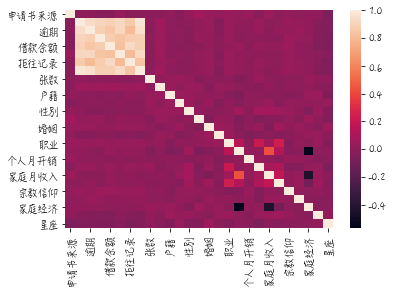

In [17]:
correlations=credit_card_data.corr()
print(correlations)

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"]="HanziPen SC"
plt.rcParams['font.sans-serif'] = ['HanziPen SC', 'sans-serif']
plt.rcParams['font.serif'] = ['HanziPen SC']
plt.rcParams['axes.unicode_minus']=False

sns.heatmap(correlations)
plt.savefig('heatmap.png')
plt.show()

             瑕疵户        逾期        呆账    强制停卡记录        退票      拒往记录
瑕疵户     1.000000  0.938601  0.906131  0.971477  0.919011  0.862152
逾期      0.938601  1.000000  0.880118  0.951528  0.917134  0.799604
呆账      0.906131  0.880118  1.000000  0.880285  0.836368  0.867265
强制停卡记录  0.971477  0.951528  0.880285  1.000000  0.932399  0.837070
退票      0.919011  0.917134  0.836368  0.932399  1.000000  0.800673
拒往记录    0.862152  0.799604  0.867265  0.837070  0.800673  1.000000


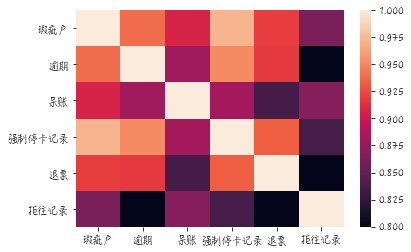

In [26]:
# 根据特征瑕疵户、逾期、呆账、强制停卡记录、退票、拒往记录，构建历史行为特征
previous_behaviour = credit_card_data[['瑕疵户', '逾期', '呆账', '强制停卡记录', '退票', '拒往记录']]

previous_behaviour_correlations=previous_behaviour.corr()
print(previous_behaviour_correlations)

'''sns.pairplot(previous_behaviour_correlations)
plt.savefig('previous_behaviour_pairplot.png')
plt.show()'''

sns.heatmap(previous_behaviour_correlations)
plt.savefig('previous_behaviour_heatmap.png')
plt.show()

           借款余额     个人月收入     个人月开销     家庭月收入      月刷卡额
借款余额   1.000000  0.029213 -0.016987  0.012863  0.017698
个人月收入  0.029213  1.000000  0.013665  0.430502  0.127512
个人月开销 -0.016987  0.013665  1.000000  0.014114 -0.015611
家庭月收入  0.012863  0.430502  0.014114  1.000000  0.180340
月刷卡额   0.017698  0.127512 -0.015611  0.180340  1.000000


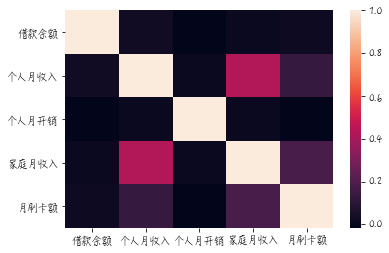

In [28]:
# 根据特征借款余额、个人月收入、个人月开销、家庭月收入和月刷卡额，构建出经济风险情况特征
economic_risk_feature = credit_card_data[['借款余额', '个人月收入', '个人月开销', '家庭月收入', '月刷卡额']]

economic_risk_feature_correlations=economic_risk_feature.corr()
print(economic_risk_feature_correlations)

'''sns.pairplot(economic_risk_feature_correlations)
plt.savefig('economic_risk_feature_pairplot.png')
plt.show()'''

sns.heatmap(economic_risk_feature_correlations)
plt.savefig('economic_risk_feature_heatmap.png')
plt.show()

          职业        年龄        住家
职业  1.000000  0.010800  0.209242
年龄  0.010800  1.000000 -0.047024
住家  0.209242 -0.047024  1.000000


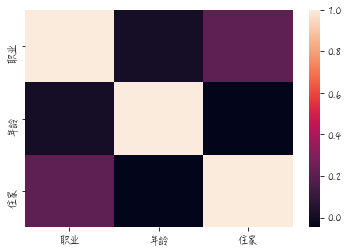

In [30]:
# 根据特征职业、年龄、住家、构建出收入风险情况特征
income_risk_feature = credit_card_data[['职业', '年龄', '住家']]

income_risk_feature_correlations=income_risk_feature.corr()
print(income_risk_feature_correlations)

'''sns.pairplot(income_risk_feature_correlations)
plt.savefig('income_risk_feature_pairplot.png')
plt.show()'''

sns.heatmap(income_risk_feature_correlations)
plt.savefig('income_risk_feature_heatmap.png')
plt.show()

In [31]:
temp_features = pd.concat([previous_behaviour, economic_risk_feature, income_risk_feature], axis=1)

# 标准化历史行为、经济风险情况、收入风险情况特征
from sklearn.preprocessing import StandardScaler

previous_behaviour == StandardScaler().fit_transform(previous_behaviour)
economic_risk_feature = StandardScaler().fit_transform(economic_risk_feature)
income_risk_feature = StandardScaler().fit_transform(income_risk_feature)

features = StandardScaler().fit_transform(temp_features)

In [32]:
# 构建 K-Means 聚类模型，聚类数为 5
from sklearn.cluster import KMeans

magic_model = KMeans(n_clusters=5)

# 训练 K-Means 聚类模型，并求出聚类中心，每类的用户数目
trained_model = magic_model.fit(features)
cluster_labels = magic_model.fit_predict(features)  # the array of cluster labels each data point belongs to

features_belongs2_label_0 = features[cluster_labels == 0]
features_belongs2_label_1 = features[cluster_labels == 1]
features_belongs2_label_2 = features[cluster_labels == 2]
features_belongs2_label_3 = features[cluster_labels == 3]
features_belongs2_label_4 = features[cluster_labels == 4]

centre = trained_model.cluster_centers_
print('聚类中心：\n', centre)    #5个中心，14维数
user_counts = pd.Series(trained_model.labels_).value_counts()
print('每类的用户数目：\n', user_counts)

聚类中心：
 [[ 2.38645856e-01  2.33745485e-01  2.16244525e-01  2.45652727e-01
   2.33971699e-01  2.43249269e-01  2.47966132e-01  2.02085225e+00
   1.13567962e-02 -1.78978195e+00 -7.36305805e-02  4.31891067e-01
  -6.16506975e-02 -9.49959227e-02]
 [-4.10720266e+00 -3.93950427e+00 -3.72166566e+00 -4.07078729e+00
  -3.85887982e+00 -3.54032989e+00 -3.71273931e+00 -7.11515512e-02
   2.21114353e-02 -1.60064549e-03 -1.97462170e-02 -1.71579978e-01
  -6.24941711e-02 -1.29333140e-01]
 [ 2.38645856e-01  2.33745485e-01  2.16244525e-01  2.45652727e-01
   2.19374004e-01  2.15049517e-01  2.34104210e-01 -8.68238875e-01
   7.91112203e-03 -5.82361595e-01  2.94948691e-01  5.09360248e-01
   6.88156168e-02  2.10097844e-01]
 [ 2.38645856e-01  2.33745485e-01  2.16244525e-01  2.45652727e-01
   2.33971699e-01  1.54579208e-01  1.83100706e-01 -6.04497928e-01
  -3.93587960e-02 -3.92790816e-01 -8.24078148e-01 -1.34946191e+00
   2.96505914e-02 -4.39688359e-01]
 [ 2.38645856e-01  2.21140754e-01  2.16244525e-01  2.21912213

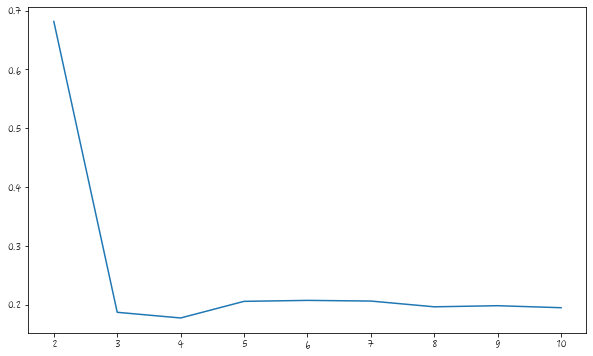

In [33]:
from sklearn.metrics import silhouette_score

silhouettteScore = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i,random_state=123).fit(features)
    score = silhouette_score(features,kmeans.labels_)
    silhouettteScore.append(score)

plt.figure(figsize=(10,6))
plt.plot(range(2,11),silhouettteScore,linewidth=1.5, linestyle="-")
plt.show()

In [51]:
from sklearn.decomposition import PCA

features_PCA_rules = PCA(n_components=2).fit(features)
features_PCA = features_PCA_rules.transform(features)
features_PCA = pd.DataFrame(features_PCA)
print('PCA降维后：\n', features_PCA)

PCA降维后：
               0         1
0     -0.606475 -2.510055
1     -0.631581 -1.842047
2     -0.611127 -1.149189
3     -0.618473 -1.840741
4     -0.605927 -1.492478
...         ...       ...
60573 -0.668425  0.942826
60574 -0.676135  1.625942
60575 -0.668974  1.833363
60576 -0.669608  0.989036
60577 -0.606475 -2.510055

[60578 rows x 2 columns]


In [54]:
# 构建 K-Means 聚类模型，聚类数为 5
from sklearn.cluster import KMeans

magic_model = KMeans(n_clusters=5)

# 训练 K-Means 聚类模型，并求出聚类中心，每类的用户数目
trained_model = magic_model.fit(features_PCA)
cluster_labels = magic_model.fit_predict(features_PCA)  # the array of cluster labels each data point belongs to

print(np.unique(cluster_labels))

features_belongs2_label_0 = features_PCA[cluster_labels == 0]
print(features_belongs2_label_0)
print(type(features_belongs2_label_0))
features_belongs2_label_1 = features_PCA[cluster_labels == 1]
features_belongs2_label_2 = features_PCA[cluster_labels == 2]
features_belongs2_label_3 = features_PCA[cluster_labels == 3]
features_belongs2_label_4 = features_PCA[cluster_labels == 4]

centre = trained_model.cluster_centers_
print('聚类中心：\n', centre)    #5个中心，14维数
user_counts = pd.Series(trained_model.labels_).value_counts()
print('每类的用户数目：\n', user_counts)

[0 1 2 3 4]
              0         1
18    -0.598080 -0.786677
23    -0.632187 -0.877352
39    -0.626562 -0.326537
51    -0.635702 -0.566023
53    -0.632099 -0.849906
...         ...       ...
60548  0.913873  0.435969
60555 -0.663815  0.557842
60558 -0.631400  0.408688
60560 -0.650916  0.608923
60572 -0.656363  0.471144

[24016 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
聚类中心：
 [[-0.62097611 -0.10911465]
 [10.78575881  0.22821837]
 [-0.64649916  1.38132752]
 [-0.54334432 -1.7313191 ]
 [ 6.66056257 -0.80091117]]
每类的用户数目：
 0    24016
2    19184
3    13850
1     2750
4      778
dtype: int64


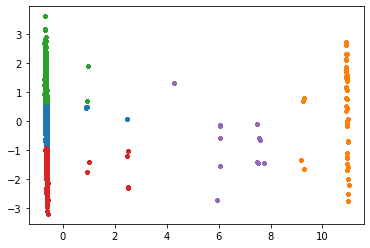

In [62]:
import matplotlib.pyplot as plt

plt.scatter(features_belongs2_label_0[0],features_belongs2_label_0[1],s=10)
plt.scatter(features_belongs2_label_1[0],features_belongs2_label_1[1],s=10)
plt.scatter(features_belongs2_label_2[0],features_belongs2_label_2[1],s=10)
plt.scatter(features_belongs2_label_3[0],features_belongs2_label_3[1],s=10)
plt.scatter(features_belongs2_label_4[0],features_belongs2_label_4[1],s=10)